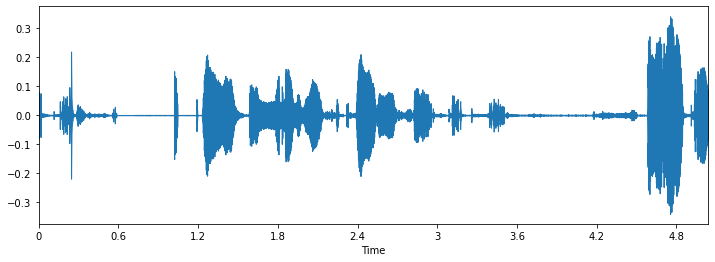

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

data, sampling_rate = librosa.load(r"Z:\audios\T_1\ARI5-1635780915.0-in.wav");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

In [3]:
from pydub import AudioSegment

sound_file = AudioSegment.from_wav(r"Z:\audios\T_1\ARI5-1635780915.0-in.wav")

C:\Users\trainee6\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
import IPython.display as ipd

ipd.Audio(r"Z:\audios\T_1\ARI5-1635780915.0-in.wav")

In [5]:
import os

In [7]:
file_names = os.listdir(r"Z:\audios\T_1")

In [ ]:
# ARI8-1635624453.10029-in.wav

In [13]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

file_names = file_names[0:10]
 
for file_name in file_names:
    sound_file = AudioSegment.from_wav("Z:/audios/T_1/" + str(file_name))                                  
    audio_chunks = split_on_silence(sound_file, min_silence_len=500, silence_thresh=-40 )
    file_name = file_name.replace('.wav', '')
 
    for i, chunk in enumerate(audio_chunks):
        out_file =  "audio_chunks/" + file_name + "-{0}.wav".format(i+1)
        print("exporting", out_file)
        chunk.export(out_file, format="wav")

exporting audio_chunks/ARI5-1635886138.7133-in-1.wav
exporting audio_chunks/ARI11-1635868694.5812-in-1.wav
exporting audio_chunks/ARI11-1635868694.5812-in-2.wav
exporting audio_chunks/ARI9-1635957483.12531-in-1.wav
exporting audio_chunks/ARI9-1635957483.12531-in-2.wav
exporting audio_chunks/ARI9-1635957483.12531-in-3.wav
exporting audio_chunks/ARI9-1635957483.12531-in-4.wav
exporting audio_chunks/ARI9-1635778967.4802-in-1.wav
exporting audio_chunks/ARI9-1635778967.4802-in-2.wav
exporting audio_chunks/ARI9-1635778967.4802-in-3.wav
exporting audio_chunks/ARI9-1635778967.4802-in-4.wav
exporting audio_chunks/ARI9-1635778967.4802-in-5.wav
exporting audio_chunks/ARI8-1635807597.25953-in-1.wav
exporting audio_chunks/ARI8-1635807597.25953-in-2.wav
exporting audio_chunks/ARI8-1635807597.25953-in-3.wav
exporting audio_chunks/ARI8-1635807597.25953-in-4.wav
exporting audio_chunks/ARI8-1635807597.25953-in-5.wav
exporting audio_chunks/ARI8-1635807597.25953-in-6.wav
exporting audio_chunks/ARI8-163580

In [16]:
import os

file_names = os.listdir(r"Z:\audios\T_1")


# Import the AudioSegment class for processing audio and the 
# split_on_silence function for separating out silent chunks.
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define a function to normalize a chunk to a target amplitude.
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

for file_name in file_names:
    # Load your audio.
    song = AudioSegment.from_wav("Z:/audios/T_1/" + str(file_name))

    # Split track where the silence is 2 seconds or more and get chunks using 
    # the imported function.
    chunks = split_on_silence (
        # Use the loaded audio.
        song, 
        # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
        min_silence_len = 1800, #1800
        # Consider a chunk silent if it's quieter than -16 dBFS.
        # (You may want to adjust this parameter.)
        silence_thresh = -27, #-27

        keep_silence=200
    )
    
    file_name = file_name.replace('.wav', '')

    # Process each chunk with your parameters
    for i, chunk in enumerate(chunks):
        # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
        silence_chunk = AudioSegment.silent(duration=500)

        # Add the padding chunk to beginning and end of the entire chunk.
        audio_chunk = silence_chunk + chunk + silence_chunk

        # Normalize the entire chunk.
        normalized_chunk = match_target_amplitude(audio_chunk, -20.0)

        # Export the audio chunk with new bitrate.
        print("Exporting" + file_name + "-{0}.wav".format(i))
        normalized_chunk.export(
            "audio_chunks/" + file_name + "-{0}.wav".format(i+1),
            bitrate = "192k",
            format = "wav"
        )

ExportingARI5-1635886138.7133-in-0.wav
ExportingARI9-1635957483.12531-in-0.wav
ExportingARI9-1635957483.12531-in-1.wav
ExportingARI9-1635778967.4802-in-0.wav
ExportingARI9-1635778967.4802-in-1.wav
ExportingARI9-1635778967.4802-in-2.wav
ExportingARI8-1635807597.25953-in-0.wav
ExportingARI8-1635807597.25953-in-1.wav
ExportingARI8-1635807597.25953-in-2.wav
ExportingARI8-1635807597.25953-in-3.wav
ExportingARI12-1635870626.16083-in-0.wav
ExportingARI12-1635870626.16083-in-1.wav
ExportingARI9-1635787215.44734-in-0.wav
ExportingARI9-1635787215.44734-in-1.wav
ExportingARI9-1635787215.44734-in-2.wav
ExportingARI9-1635787215.44734-in-3.wav
ExportingARI9-1635787215.44734-in-4.wav
ExportingARI11-1635871703.10002-in-0.wav
ExportingARI10-1635786832.26669-in-0.wav
ExportingARI10-1635786832.26669-in-1.wav
ExportingARI12-1635873112.27299-in-0.wav
ExportingARI12-1634924163.16345-in-0.wav
ExportingARI8-1635894927.15668-in-0.wav
ExportingARI6-1635003448.9109-in-0.wav
ExportingARI6-1635003448.9109-in-1.wav

ExportingARI6-1634936442.9065-in-0.wav
ExportingARI6-1634936442.9065-in-1.wav
ExportingARI8-1635795552.10941-in-0.wav
ExportingARI8-1635952446.24895-in-0.wav
ExportingARI7-1635626161.11241-in-0.wav
ExportingARI8-1635780404.4234-in-0.wav
ExportingARI5-1635893818.24321-in-0.wav
ExportingARI12-1634925887.24248-in-0.wav
ExportingARI11-1635884882.2242-in-0.wav
ExportingARI9-1635958388.14235-in-0.wav
ExportingARI10-1635786792.26508-in-0.wav
ExportingARI8-1635892978.3243-in-0.wav
ExportingARI8-1635779144.1177-in-0.wav
ExportingARI8-1635779144.1177-in-1.wav
ExportingARI8-1635779144.1177-in-2.wav
ExportingARI8-1635779144.1177-in-3.wav
ExportingARI8-1635779144.1177-in-4.wav
ExportingARI8-1635779144.1177-in-5.wav
ExportingARI8-1635779144.1177-in-6.wav
ExportingARI10-1635626074.197711-in-0.wav
ExportingARI9-1635778558.1726-in-0.wav
ExportingARI10-1634939397.45736-in-0.wav
ExportingARI10-1634939397.45736-in-1.wav
ExportingARI10-1634939397.45736-in-2.wav
ExportingARI10-1634939397.45736-in-3.wav
Expo

ExportingARI10-1634941979.51221-in-0.wav
ExportingARI10-1634941979.51221-in-1.wav
ExportingARI8-1635955733.35553-in-0.wav
ExportingARI8-1635955733.35553-in-1.wav
ExportingARI6-1634935719.6031-in-0.wav
ExportingARI6-1634935719.6031-in-1.wav
ExportingARI6-1634935719.6031-in-2.wav
ExportingARI6-1634935719.6031-in-3.wav
ExportingARI6-1634935719.6031-in-4.wav
ExportingARI6-1634935719.6031-in-5.wav
ExportingARI9-1635000779.1177-in-0.wav
ExportingARI9-1635000779.1177-in-1.wav
ExportingARI5-1635891426.17745-in-0.wav
ExportingARI5-1635891426.17745-in-1.wav
ExportingARI5-1635891426.17745-in-2.wav
ExportingARI5-1635891426.17745-in-3.wav
ExportingARI5-1635891426.17745-in-4.wav
ExportingARI8-1635952593.25408-in-0.wav
ExportingARI10-1634935659.37692-in-0.wav
ExportingARI10-1634935659.37692-in-1.wav
ExportingARI10-1635780080.4346-in-0.wav
ExportingARI8-1635006399.4564-in-0.wav
ExportingARI8-1635006399.4564-in-1.wav
ExportingARI10-1634931788.29162-in-0.wav
ExportingARI10-1634931788.29162-in-1.wav
Expo

ExportingARI7-1635951756.11272-in-0.wav
ExportingARI10-1635005020.18134-in-0.wav
ExportingARI10-1635005020.18134-in-1.wav
ExportingARI9-1635783599.30555-in-0.wav
ExportingARI6-1635892169.2702-in-0.wav
ExportingARI13-1635877873.4227-in-0.wav
ExportingARI10-1635951581.7505-in-0.wav
ExportingARI10-1635951581.7505-in-1.wav
ExportingARI10-1635951581.7505-in-2.wav
ExportingARI6-1635952429.9042-in-0.wav
ExportingARI12-1635874005.31325-in-0.wav
ExportingARI12-1635874005.31325-in-1.wav
ExportingARI5-1635798677.34815-in-0.wav
ExportingARI12-1635871197.18388-in-0.wav
ExportingARI7-1635625544.9531-in-0.wav
ExportingARI12-1634923634.13957-in-0.wav
ExportingARI10-1635003446.12339-in-0.wav
ExportingARI10-1635003446.12339-in-1.wav
ExportingARI5-1635801046.40217-in-0.wav
ExportingARI8-1635951916.23379-in-0.wav
ExportingARI9-1635784425.33338-in-0.wav
ExportingARI8-1635951326.21401-in-0.wav
ExportingARI6-1635003687.9949-in-0.wav
ExportingARI10-1634939020.44957-in-0.wav
ExportingARI10-1634939020.44957-in-

ExportingARI5-1635787034.18496-in-0.wav
ExportingARI12-1635875398.38181-in-0.wav
ExportingARI12-1635884730.3118-in-0.wav
ExportingARI12-1635884730.3118-in-1.wav
ExportingARI10-1634924249.16287-in-0.wav
ExportingARI6-1635625908.99154-in-0.wav
ExportingARI6-1635625908.99154-in-1.wav
ExportingARI6-1635624787.95894-in-0.wav
ExportingARI5-1635787346.19189-in-0.wav
ExportingARI12-1634925666.23423-in-0.wav
ExportingARI12-1634925666.23423-in-1.wav
ExportingARI12-1634925666.23423-in-2.wav
ExportingARI12-1634925666.23423-in-3.wav
ExportingARI12-1634925666.23423-in-4.wav
ExportingARI12-1634925666.23423-in-5.wav
ExportingARI12-1634925666.23423-in-6.wav
ExportingARI7-1635892888.2667-in-0.wav
ExportingARI9-1635783024.27804-in-0.wav
ExportingARI9-1635783024.27804-in-1.wav
ExportingARI6-1635895512.6697-in-0.wav
ExportingARI6-1635895512.6697-in-1.wav
ExportingARI6-1635625212.97605-in-0.wav
ExportingARI6-1635625212.97605-in-1.wav
ExportingARI12-1634927287.29072-in-0.wav
ExportingARI12-1634927287.29072-i

ExportingARI12-1635884462.2245-in-0.wav
ExportingARI12-1634925096.20689-in-0.wav
ExportingARI6-1635003637.9786-in-0.wav
ExportingARI6-1635003637.9786-in-1.wav
ExportingARI10-1635780831.7067-in-0.wav
ExportingARI5-1635785452.14797-in-0.wav
ExportingARI5-1635785452.14797-in-1.wav
ExportingARI8-1635006113.3769-in-0.wav
ExportingARI12-1635869742.12619-in-0.wav
ExportingARI12-1635869742.12619-in-1.wav
ExportingARI9-1635001191.2145-in-0.wav
ExportingARI9-1635001191.2145-in-1.wav
ExportingARI9-1635001191.2145-in-2.wav
ExportingARI9-1635001191.2145-in-3.wav
ExportingARI9-1635001191.2145-in-4.wav
ExportingARI9-1635001191.2145-in-5.wav
ExportingARI12-1635884363.1891-in-0.wav
ExportingARI12-1635884363.1891-in-1.wav
ExportingARI10-1635885890.3297-in-0.wav
ExportingARI10-1635885890.3297-in-1.wav
ExportingARI10-1635885890.3297-in-2.wav
ExportingARI10-1635887257.5338-in-0.wav
ExportingARI5-1635789410.24244-in-0.wav
ExportingARI9-1635786998.43636-in-0.wav
ExportingARI11-1634934046.563-in-0.wav
Exporti

ExportingARI6-1635002807.6742-in-0.wav
ExportingARI6-1635002807.6742-in-1.wav
ExportingARI6-1635002807.6742-in-2.wav
ExportingARI6-1635002807.6742-in-3.wav
ExportingARI6-1635002807.6742-in-4.wav
ExportingARI10-1634926631.25243-in-0.wav
ExportingARI8-1634930861.2114-in-0.wav
ExportingARI5-1635799895.38385-in-0.wav
ExportingARI10-1635784810.20015-in-0.wav
ExportingARI10-1635784810.20015-in-1.wav
ExportingARI6-1634935534.5272-in-0.wav
ExportingARI11-1635883923.905-in-0.wav
ExportingARI11-1635883923.905-in-1.wav
ExportingARI11-1635883923.905-in-2.wav
ExportingARI11-1635883923.905-in-3.wav
ExportingARI8-1634933320.9824-in-0.wav
ExportingARI12-1635867456.2743-in-0.wav
ExportingARI12-1635867456.2743-in-1.wav
ExportingARI12-1635867456.2743-in-2.wav
ExportingARI10-1634937794.42364-in-0.wav
ExportingARI10-1634937794.42364-in-1.wav
ExportingARI12-1635871250.18635-in-0.wav
ExportingARI10-1634931022.27327-in-0.wav
ExportingARI10-1635625856.196728-in-0.wav
ExportingARI9-1635784493.33511-in-0.wav
Exp

ExportingARI10-1635004476.16369-in-181.wav
ExportingARI10-1635004476.16369-in-182.wav
ExportingARI10-1635004476.16369-in-183.wav
ExportingARI10-1635004476.16369-in-184.wav
ExportingARI10-1635004476.16369-in-185.wav
ExportingARI10-1635004476.16369-in-186.wav
ExportingARI10-1635004476.16369-in-187.wav
ExportingARI10-1635004476.16369-in-188.wav
ExportingARI10-1635004476.16369-in-189.wav
ExportingARI10-1635004476.16369-in-190.wav
ExportingARI10-1635004476.16369-in-191.wav
ExportingARI10-1635004476.16369-in-192.wav
ExportingARI10-1635004476.16369-in-193.wav
ExportingARI10-1635004476.16369-in-194.wav
ExportingARI10-1635004476.16369-in-195.wav
ExportingARI10-1635004476.16369-in-196.wav
ExportingARI10-1635004476.16369-in-197.wav
ExportingARI10-1635004476.16369-in-198.wav
ExportingARI10-1635004476.16369-in-199.wav
ExportingARI10-1635004476.16369-in-200.wav
ExportingARI10-1635004476.16369-in-201.wav
ExportingARI10-1635004476.16369-in-202.wav
ExportingARI10-1635004476.16369-in-203.wav
ExportingAR

ExportingARI10-1635004476.16369-in-408.wav
ExportingARI10-1635004476.16369-in-409.wav
ExportingARI10-1635004476.16369-in-410.wav
ExportingARI10-1635004476.16369-in-411.wav
ExportingARI10-1635004476.16369-in-412.wav
ExportingARI10-1635004476.16369-in-413.wav
ExportingARI10-1635004476.16369-in-414.wav
ExportingARI10-1635004476.16369-in-415.wav
ExportingARI10-1635004476.16369-in-416.wav
ExportingARI10-1635004476.16369-in-417.wav
ExportingARI10-1635004476.16369-in-418.wav
ExportingARI10-1635004476.16369-in-419.wav
ExportingARI10-1635004476.16369-in-420.wav
ExportingARI10-1635004476.16369-in-421.wav
ExportingARI10-1635004476.16369-in-422.wav
ExportingARI10-1635004476.16369-in-423.wav
ExportingARI10-1635004476.16369-in-424.wav
ExportingARI10-1635004476.16369-in-425.wav
ExportingARI10-1635004476.16369-in-426.wav
ExportingARI10-1635004476.16369-in-427.wav
ExportingARI10-1635004476.16369-in-428.wav
ExportingARI10-1635004476.16369-in-429.wav
ExportingARI10-1635004476.16369-in-430.wav
ExportingAR

ExportingARI10-1635004476.16369-in-602.wav
ExportingARI10-1635004476.16369-in-603.wav
ExportingARI10-1635004476.16369-in-604.wav
ExportingARI10-1635004476.16369-in-605.wav
ExportingARI10-1635004476.16369-in-606.wav
ExportingARI10-1635004476.16369-in-607.wav
ExportingARI10-1635004476.16369-in-608.wav
ExportingARI10-1635004476.16369-in-609.wav
ExportingARI10-1635004476.16369-in-610.wav
ExportingARI10-1635004476.16369-in-611.wav
ExportingARI10-1635004476.16369-in-612.wav
ExportingARI10-1635004476.16369-in-613.wav
ExportingARI10-1635004476.16369-in-614.wav
ExportingARI10-1635004476.16369-in-615.wav
ExportingARI10-1635004476.16369-in-616.wav
ExportingARI10-1635004476.16369-in-617.wav
ExportingARI10-1635004476.16369-in-618.wav
ExportingARI10-1635004476.16369-in-619.wav
ExportingARI10-1635004476.16369-in-620.wav
ExportingARI10-1635004476.16369-in-621.wav
ExportingARI10-1635004476.16369-in-622.wav
ExportingARI10-1635004476.16369-in-623.wav
ExportingARI10-1635004476.16369-in-624.wav
ExportingAR

ExportingARI10-1635004476.16369-in-796.wav
ExportingARI10-1635004476.16369-in-797.wav
ExportingARI10-1635004476.16369-in-798.wav
ExportingARI10-1635004476.16369-in-799.wav
ExportingARI10-1635004476.16369-in-800.wav
ExportingARI10-1635004476.16369-in-801.wav
ExportingARI10-1635004476.16369-in-802.wav
ExportingARI10-1635004476.16369-in-803.wav
ExportingARI10-1635004476.16369-in-804.wav
ExportingARI10-1635004476.16369-in-805.wav
ExportingARI10-1635004476.16369-in-806.wav
ExportingARI10-1635004476.16369-in-807.wav
ExportingARI10-1635004476.16369-in-808.wav
ExportingARI10-1635004476.16369-in-809.wav
ExportingARI10-1635004476.16369-in-810.wav
ExportingARI10-1635004476.16369-in-811.wav
ExportingARI10-1635004476.16369-in-812.wav
ExportingARI10-1635004476.16369-in-813.wav
ExportingARI10-1635004476.16369-in-814.wav
ExportingARI10-1635004476.16369-in-815.wav
ExportingARI10-1635004476.16369-in-816.wav
ExportingARI10-1635004476.16369-in-817.wav
ExportingARI10-1635004476.16369-in-818.wav
ExportingAR

ExportingARI10-1635004476.16369-in-1001.wav
ExportingARI10-1635004476.16369-in-1002.wav
ExportingARI10-1635004476.16369-in-1003.wav
ExportingARI10-1635004476.16369-in-1004.wav
ExportingARI10-1635004476.16369-in-1005.wav
ExportingARI10-1635004476.16369-in-1006.wav
ExportingARI10-1635004476.16369-in-1007.wav
ExportingARI10-1635004476.16369-in-1008.wav
ExportingARI10-1635004476.16369-in-1009.wav
ExportingARI10-1635004476.16369-in-1010.wav
ExportingARI10-1635004476.16369-in-1011.wav
ExportingARI10-1635004476.16369-in-1012.wav
ExportingARI10-1635004476.16369-in-1013.wav
ExportingARI10-1635004476.16369-in-1014.wav
ExportingARI10-1635004476.16369-in-1015.wav
ExportingARI10-1635004476.16369-in-1016.wav
ExportingARI10-1635004476.16369-in-1017.wav
ExportingARI10-1635004476.16369-in-1018.wav
ExportingARI10-1635004476.16369-in-1019.wav
ExportingARI10-1635004476.16369-in-1020.wav
ExportingARI10-1635004476.16369-in-1021.wav
ExportingARI10-1635004476.16369-in-1022.wav
ExportingARI10-1635004476.16369-

ExportingARI10-1635004476.16369-in-1194.wav
ExportingARI10-1635004476.16369-in-1195.wav
ExportingARI10-1635004476.16369-in-1196.wav
ExportingARI10-1635004476.16369-in-1197.wav
ExportingARI10-1635004476.16369-in-1198.wav
ExportingARI10-1635004476.16369-in-1199.wav
ExportingARI10-1635004476.16369-in-1200.wav
ExportingARI10-1635004476.16369-in-1201.wav
ExportingARI10-1635004476.16369-in-1202.wav
ExportingARI10-1635004476.16369-in-1203.wav
ExportingARI10-1635004476.16369-in-1204.wav
ExportingARI10-1635004476.16369-in-1205.wav
ExportingARI10-1635004476.16369-in-1206.wav
ExportingARI10-1635004476.16369-in-1207.wav
ExportingARI10-1635004476.16369-in-1208.wav
ExportingARI10-1635004476.16369-in-1209.wav
ExportingARI10-1635004476.16369-in-1210.wav
ExportingARI10-1635004476.16369-in-1211.wav
ExportingARI10-1635004476.16369-in-1212.wav
ExportingARI10-1635004476.16369-in-1213.wav
ExportingARI10-1635004476.16369-in-1214.wav
ExportingARI10-1635004476.16369-in-1215.wav
ExportingARI10-1635004476.16369-

ExportingARI10-1635004476.16369-in-1395.wav
ExportingARI10-1635004476.16369-in-1396.wav
ExportingARI10-1635004476.16369-in-1397.wav
ExportingARI10-1635004476.16369-in-1398.wav
ExportingARI10-1635004476.16369-in-1399.wav
ExportingARI10-1635004476.16369-in-1400.wav
ExportingARI10-1635004476.16369-in-1401.wav
ExportingARI10-1635004476.16369-in-1402.wav
ExportingARI10-1635004476.16369-in-1403.wav
ExportingARI10-1635004476.16369-in-1404.wav
ExportingARI10-1635004476.16369-in-1405.wav
ExportingARI10-1635004476.16369-in-1406.wav
ExportingARI10-1635004476.16369-in-1407.wav
ExportingARI10-1635004476.16369-in-1408.wav
ExportingARI10-1635004476.16369-in-1409.wav
ExportingARI10-1635004476.16369-in-1410.wav
ExportingARI10-1635004476.16369-in-1411.wav
ExportingARI10-1635004476.16369-in-1412.wav
ExportingARI10-1635004476.16369-in-1413.wav
ExportingARI10-1635004476.16369-in-1414.wav
ExportingARI10-1635004476.16369-in-1415.wav
ExportingARI10-1635004476.16369-in-1416.wav
ExportingARI10-1635004476.16369-

ExportingARI10-1635004476.16369-in-1603.wav
ExportingARI10-1635004476.16369-in-1604.wav
ExportingARI10-1635004476.16369-in-1605.wav
ExportingARI10-1635004476.16369-in-1606.wav
ExportingARI10-1635004476.16369-in-1607.wav
ExportingARI10-1635004476.16369-in-1608.wav
ExportingARI10-1635004476.16369-in-1609.wav
ExportingARI10-1635004476.16369-in-1610.wav
ExportingARI10-1635004476.16369-in-1611.wav
ExportingARI10-1635004476.16369-in-1612.wav
ExportingARI10-1635004476.16369-in-1613.wav
ExportingARI10-1635004476.16369-in-1614.wav
ExportingARI10-1635004476.16369-in-1615.wav
ExportingARI10-1635004476.16369-in-1616.wav
ExportingARI10-1635004476.16369-in-1617.wav
ExportingARI10-1635004476.16369-in-1618.wav
ExportingARI10-1635004476.16369-in-1619.wav
ExportingARI10-1635004476.16369-in-1620.wav
ExportingARI10-1635004476.16369-in-1621.wav
ExportingARI10-1635004476.16369-in-1622.wav
ExportingARI10-1635004476.16369-in-1623.wav
ExportingARI10-1635004476.16369-in-1624.wav
ExportingARI10-1635004476.16369-

ExportingARI10-1635004476.16369-in-1822.wav
ExportingARI10-1635004476.16369-in-1823.wav
ExportingARI10-1635004476.16369-in-1824.wav
ExportingARI10-1635004476.16369-in-1825.wav
ExportingARI10-1635004476.16369-in-1826.wav
ExportingARI10-1635004476.16369-in-1827.wav
ExportingARI10-1635004476.16369-in-1828.wav
ExportingARI10-1635004476.16369-in-1829.wav
ExportingARI10-1635004476.16369-in-1830.wav
ExportingARI10-1635004476.16369-in-1831.wav
ExportingARI10-1635004476.16369-in-1832.wav
ExportingARI10-1635004476.16369-in-1833.wav
ExportingARI10-1635004476.16369-in-1834.wav
ExportingARI10-1635004476.16369-in-1835.wav
ExportingARI10-1635004476.16369-in-1836.wav
ExportingARI10-1635004476.16369-in-1837.wav
ExportingARI10-1635004476.16369-in-1838.wav
ExportingARI10-1635004476.16369-in-1839.wav
ExportingARI10-1635004476.16369-in-1840.wav
ExportingARI10-1635004476.16369-in-1841.wav
ExportingARI10-1635004476.16369-in-1842.wav
ExportingARI10-1635004476.16369-in-1843.wav
ExportingARI10-1635004476.16369-

ExportingARI10-1635004476.16369-in-2033.wav
ExportingARI10-1635004476.16369-in-2034.wav
ExportingARI10-1635004476.16369-in-2035.wav
ExportingARI10-1635004476.16369-in-2036.wav
ExportingARI10-1635004476.16369-in-2037.wav
ExportingARI10-1635004476.16369-in-2038.wav
ExportingARI10-1635004476.16369-in-2039.wav
ExportingARI10-1635004476.16369-in-2040.wav
ExportingARI10-1635004476.16369-in-2041.wav
ExportingARI10-1635004476.16369-in-2042.wav
ExportingARI10-1635004476.16369-in-2043.wav
ExportingARI10-1635004476.16369-in-2044.wav
ExportingARI10-1635004476.16369-in-2045.wav
ExportingARI10-1635004476.16369-in-2046.wav
ExportingARI10-1635004476.16369-in-2047.wav
ExportingARI10-1635004476.16369-in-2048.wav
ExportingARI10-1635004476.16369-in-2049.wav
ExportingARI10-1635004476.16369-in-2050.wav
ExportingARI10-1635004476.16369-in-2051.wav
ExportingARI10-1635004476.16369-in-2052.wav
ExportingARI10-1635004476.16369-in-2053.wav
ExportingARI10-1635004476.16369-in-2054.wav
ExportingARI10-1635004476.16369-

ExportingARI10-1635004476.16369-in-2220.wav
ExportingARI10-1635004476.16369-in-2221.wav
ExportingARI10-1635004476.16369-in-2222.wav
ExportingARI10-1635004476.16369-in-2223.wav
ExportingARI10-1635004476.16369-in-2224.wav
ExportingARI10-1635004476.16369-in-2225.wav
ExportingARI10-1635004476.16369-in-2226.wav
ExportingARI10-1635004476.16369-in-2227.wav
ExportingARI10-1635004476.16369-in-2228.wav
ExportingARI10-1635004476.16369-in-2229.wav
ExportingARI10-1635004476.16369-in-2230.wav
ExportingARI10-1635004476.16369-in-2231.wav
ExportingARI10-1635004476.16369-in-2232.wav
ExportingARI10-1635004476.16369-in-2233.wav
ExportingARI10-1635004476.16369-in-2234.wav
ExportingARI10-1635004476.16369-in-2235.wav
ExportingARI10-1635004476.16369-in-2236.wav
ExportingARI10-1635004476.16369-in-2237.wav
ExportingARI10-1635004476.16369-in-2238.wav
ExportingARI10-1635004476.16369-in-2239.wav
ExportingARI10-1635004476.16369-in-2240.wav
ExportingARI10-1635004476.16369-in-2241.wav
ExportingARI10-1635004476.16369-

ExportingARI9-1635796505.56985-in-0.wav
ExportingARI9-1635796505.56985-in-1.wav
ExportingARI12-1635872770.25651-in-0.wav
ExportingARI6-1635624905.96598-in-0.wav
ExportingARI6-1635624905.96598-in-1.wav
ExportingARI12-1635875367.37995-in-0.wav
ExportingARI11-1635885034.2761-in-0.wav
ExportingARI11-1635885034.2761-in-1.wav
ExportingARI11-1635873009.11986-in-0.wav
ExportingARI11-1635873009.11986-in-1.wav
ExportingARI11-1635873009.11986-in-2.wav
ExportingARI11-1635873009.11986-in-3.wav
ExportingARI11-1635873009.11986-in-4.wav
ExportingARI11-1635873009.11986-in-5.wav
ExportingARI11-1635873009.11986-in-6.wav
ExportingARI11-1635867090.3472-in-0.wav
ExportingARI5-1635888885.9724-in-0.wav
ExportingARI12-1635870836.16965-in-0.wav
ExportingARI5-1635795448.25584-in-0.wav
ExportingARI6-1635002885.7012-in-0.wav
ExportingARI6-1635002885.7012-in-1.wav
ExportingARI5-1635785440.14775-in-0.wav
ExportingARI10-1634923322.12083-in-0.wav
ExportingARI10-1634923322.12083-in-1.wav
ExportingARI10-1634923322.12083

ExportingARI7-1634942482.1112-in-0.wav
ExportingARI5-1635893978.24751-in-0.wav
ExportingARI5-1635893978.24751-in-1.wav
ExportingARI5-1635893978.24751-in-2.wav
ExportingARI12-1635884038.1555-in-0.wav
ExportingARI12-1635884038.1555-in-1.wav
ExportingARI6-1635624797.95972-in-0.wav
ExportingARI9-1635951131.1254-in-0.wav
ExportingARI12-1634926288.25603-in-0.wav
ExportingARI12-1635869716.12515-in-0.wav
ExportingARI10-1635004045.14942-in-0.wav
ExportingARI10-1635795968.35693-in-0.wav
ExportingARI10-1635795968.35693-in-1.wav
ExportingARI10-1635795968.35693-in-2.wav
ExportingARI10-1635795968.35693-in-3.wav
ExportingARI10-1635795968.35693-in-4.wav
ExportingARI11-1635868056.4983-in-0.wav
ExportingARI11-1635868056.4983-in-1.wav
ExportingARI11-1635868056.4983-in-2.wav
ExportingARI12-1635872614.24826-in-0.wav
ExportingARI8-1634932938.8779-in-0.wav
ExportingARI12-1635873532.29229-in-0.wav
ExportingARI12-1635873532.29229-in-1.wav
ExportingARI9-1635951623.2359-in-0.wav
ExportingARI10-1635884687.1212-in

C:\Users\trainee6\Anaconda3\lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
audio_chunks_path = os.listdir(r"C:\Users\trainee6\Desktop\Abdullah\audio_chunks")

In [ ]:
audio_chunks_path

In [ ]:
# match_target_amplitude(audio_chunk, -20.0)

In [ ]:
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

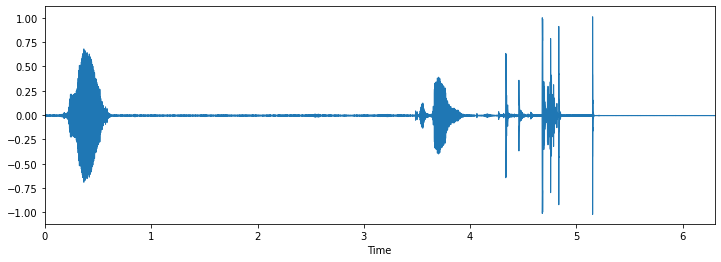

In [17]:
data, sampling_rate = librosa.load(r"Z:\audios\T_1\ARI5-1635780918.2-in.wav");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

In [18]:
new_df[new_df['audioname'] == 'ARI5-1635780918.2-in.wav']

NameError: name 'new_df' is not defined

In [ ]:
import IPython.display as ipd

ipd.Audio(r"Z:\audios\T_1\ARI5-1635780918.2-in.wav")

In [56]:
chunk = AudioSegment.from_wav(r"Z:\audios\T_1\ARI8-1635807597.25953-in.wav")

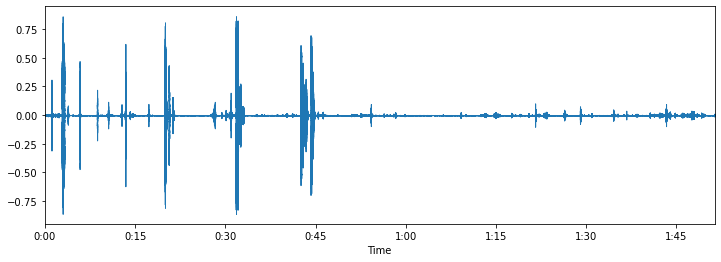

In [57]:
data, sampling_rate = librosa.load(r"Z:\audios\T_1\ARI8-1635807597.25953-in.wav");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

In [58]:
import IPython.display as ipd

ipd.Audio(r"Z:\audios\T_1\ARI8-1635807597.25953-in.wav")

Exporting chunk0.wav.
Exporting chunk1.wav.
Exporting chunk2.wav.
Exporting chunk3.wav.


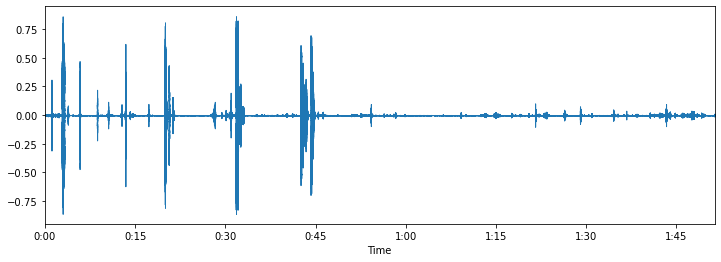

In [59]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# fileee_nameee = 'ARI5-1635780926.12-in.wav'
# ARI9-1635778967.4802-in.wav

data, sampling_rate = librosa.load(r"Z:\audios\T_1\ARI8-1635807597.25953-in.wav");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)
################################################################

# import IPython.display as ipd

# ipd.Audio(r"Z:\audios\T_1\ARI5-1635780918.2-in.wav")
####################################################################


######################################################################

# Import the AudioSegment class for processing audio and the 
# split_on_silence function for separating out silent chunks.
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define a function to normalize a chunk to a target amplitude.
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

# Load your audio.
song = AudioSegment.from_wav("Z:/audios/T_1/ARI8-1635807597.25953-in.wav")

# Split track where the silence is 2 seconds or more and get chunks using 
# the imported function.
chunks = split_on_silence (
    # Use the loaded audio.
    song, 
    # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
    min_silence_len = 1500, #1800
    # Consider a chunk silent if it's quieter than -16 dBFS.
    # (You may want to adjust this parameter.)
    silence_thresh = song.dBFS, #-27   song.dBFS
    
    keep_silence=300,
    
    seek_step=1
    
    
#     min_silence_len=100,
#     silence_thresh=song.dBFS,
#     keep_silence=100,
#     seek_step=1,
)

# Process each chunk with your parameters
for i, chunk in enumerate(chunks):
    # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
    silence_chunk = AudioSegment.silent(duration=100)

    # Add the padding chunk to beginning and end of the entire chunk.
    audio_chunk = silence_chunk + chunk + silence_chunk

    # Normalize the entire chunk.
    normalized_chunk = match_target_amplitude(audio_chunk, -20.0)

    # Export the audio chunk with new bitrate.
    print("Exporting chunk{0}.wav.".format(i))
    normalized_chunk.export(
        "chunks/chunk{0}.wav".format(i),
        bitrate = "192k",
        format = "wav"
    )
################################################################################



In [60]:
song.dBFS

-30.68168851762347

In [61]:
len(song)

111352

In [37]:
import noisereduce as nr
# import wave
# load data
# rate, data = wavfile.read(r"Z:\audios\T_1\ARI5-1635780918.2-in.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=sampling_rate)

In [38]:
reduced_noise

array([-4.7446726e-04, -1.1090560e-04,  1.7960739e-04, ...,
        6.9013413e-06,  1.9085453e-05,  1.1410110e-05], dtype=float32)

In [39]:
data

array([-0.00181696, -0.00135489, -0.00100242, ...,  0.00038886,
        0.00042114,  0.00029181], dtype=float32)

In [40]:
sampling_rate

22050

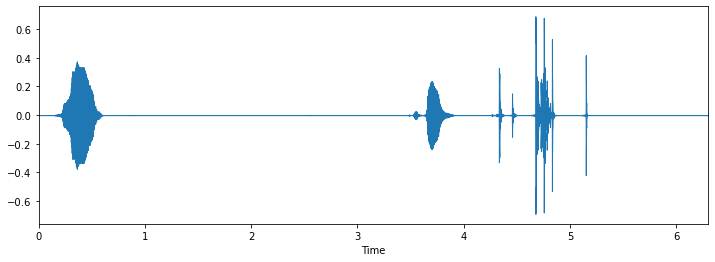

In [41]:
# data, sampling_rate = librosa.load(r"Z:\audios\T_1\ARI5-1635780918.2-in.wav");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(reduced_noise,sampling_rate)

In [31]:
chunk.apply_gain(-0.008478175039225988)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [43]:
import os

file_names = os.listdir(r"Z:\audios\T_1")


# Import the AudioSegment class for processing audio and the 
# split_on_silence function for separating out silent chunks.
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define a function to normalize a chunk to a target amplitude.
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

# file_names = file_names[:10]

for file_name in file_names:
    # Load your audio.
    song = AudioSegment.from_wav("Z:/audios/T_1/" + str(file_name))

    # Split track where the silence is 2 seconds or more and get chunks using 
    # the imported function.
    chunks = split_on_silence (
        # Use the loaded audio.
        song, 
        # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
        min_silence_len = 1800, #1800
        # Consider a chunk silent if it's quieter than -16 dBFS.
        # (You may want to adjust this parameter.)
        silence_thresh = song.dBFS, #-27

        keep_silence=300,
        
        seek_step=1
        
        
    )
    
    file_name = file_name.replace('.wav', '')

    # Process each chunk with your parameters
    for i, chunk in enumerate(chunks):
        # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
        silence_chunk = AudioSegment.silent(duration=500)

        # Add the padding chunk to beginning and end of the entire chunk.
        audio_chunk = silence_chunk + chunk + silence_chunk

        # Normalize the entire chunk.
        normalized_chunk = match_target_amplitude(audio_chunk, -20.0)

        # Export the audio chunk with new bitrate.
        print("Exporting" + file_name + "-{0}.wav".format(i))
        normalized_chunk.export(
            "chunks/" + file_name + "-{0}.wav".format(i+1),
            bitrate = "192k",
            format = "wav"
        )

ExportingARI5-1635886138.7133-in-0.wav
ExportingARI11-1635868694.5812-in-0.wav
ExportingARI11-1635868694.5812-in-1.wav
ExportingARI11-1635868694.5812-in-2.wav
ExportingARI9-1635957483.12531-in-0.wav
ExportingARI9-1635957483.12531-in-1.wav
ExportingARI9-1635957483.12531-in-2.wav
ExportingARI9-1635957483.12531-in-3.wav
ExportingARI9-1635778967.4802-in-0.wav
ExportingARI9-1635778967.4802-in-1.wav
ExportingARI9-1635778967.4802-in-2.wav
ExportingARI9-1635778967.4802-in-3.wav
ExportingARI9-1635778967.4802-in-4.wav
ExportingARI9-1635778967.4802-in-5.wav
ExportingARI9-1635778967.4802-in-6.wav
ExportingARI9-1635778967.4802-in-7.wav
ExportingARI9-1635778967.4802-in-8.wav
ExportingARI9-1635778967.4802-in-9.wav
ExportingARI9-1635778967.4802-in-10.wav
ExportingARI9-1635778967.4802-in-11.wav
ExportingARI9-1635778967.4802-in-12.wav
ExportingARI9-1635778967.4802-in-13.wav
ExportingARI8-1635807597.25953-in-0.wav
ExportingARI8-1635807597.25953-in-1.wav
ExportingARI8-1635807597.25953-in-2.wav
ExportingAR

ExportingARI11-1635871703.10002-in-0.wav
ExportingARI11-1635871703.10002-in-1.wav
ExportingARI11-1635871703.10002-in-2.wav
